<a href="https://colab.research.google.com/github/ANGEL201985/ANGEL201985/blob/main/Taller_Limite_Liquido.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

,Numero de Golpes,Peso de Tarro,Peso de Tarro Suelos Humedo,Peso de Tarro Suelo Seco,Peso de Agua,Peso de Suelos Seco,Contenido de Humedad
1,26.00,3.09,16.91,15.09,1.82,12.00,15.17
2,20.00,2.99,17.11,15.14,1.97,12.15,16.21
3,15.00,2.94,17.89,15.70,2.19,12.76,17.16


El factor de correlacion es: 0.9969789745029023


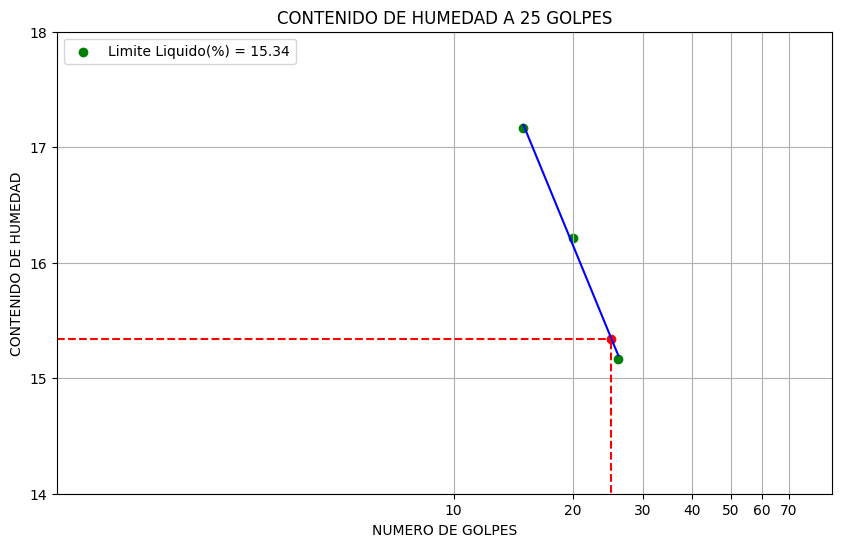

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from IPython.display import HTML
from IPython.core.display import display
from sklearn.metrics import r2_score

peso_tarro_suelo_humedo = np.array([16.91, 17.11, 17.89])
peso_tarro_suelo_seco = np.array([15.09, 15.14, 15.70])
peso_tarro = np.array([3.09, 2.99, 2.94])
numero_golpes = np.array([26, 20, 15])
#Calculando
peso_agua = np.subtract(peso_tarro_suelo_humedo , peso_tarro_suelo_seco)
peso_suelo_seco = np.subtract(peso_tarro_suelo_seco, peso_tarro )
contenido_Humedad = np.divide(peso_agua,peso_suelo_seco )*100
#Creando nuestro dataframe
df = pd.DataFrame({'Numero de Golpes':numero_golpes, 'Peso de Tarro':peso_tarro, 'Peso de Tarro Suelos Humedo':peso_tarro_suelo_humedo,
                   'Peso de Tarro Suelo Seco':peso_tarro_suelo_seco, 'Peso de Agua':peso_agua, 'Peso de Suelos Seco':peso_suelo_seco,
                   'Contenido de Humedad': contenido_Humedad}, index = [1,2,3])
#print(df)

tabla_estilos = (
    df.style
    .map(lambda val: 'background-color: lightgreen' if isinstance(val, (int, float)) else '')  # Aplica fondo verde a valores numéricos
    .format("{:.2f}")  # Formatea los valores numéricos con dos decimales
    .set_caption("Tabla de Resultados")  # Agrega un título
    .set_table_styles(
        [
            {'selector': 'caption', 'props': [('font-size', '16px'), ('font-weight', 'bold'), ('text-align', 'center')]},
            {'selector': 'th', 'props': [('background-color', '#f0f0f0'), ('color', 'black'), ('border', '1px solid gray'), ('text-align', 'center')]},
            {'selector': 'td', 'props': [('border', '1px solid gray'), ('padding', '5px'), ('text-align', 'center')]},
        ]
    )
)

# con HTML y el contenedor div centramos nuestro cuadro respecto al ancho.
display(HTML(f"""
<div style="display: flex; justify-content: center;">
    {tabla_estilos.to_html()}
</div>
"""))

#Calculamos el numero de golpes en escala logaritmica
log_numero_golpes = np.log(df['Numero de Golpes'])

# Crear mi objeto a partir del modelo LinearRegression
modelo = LinearRegression()

x = log_numero_golpes.to_frame(name = 'Numero de Golpes' )
#print(isinstance(x, pd.DataFrame))
#print(isinstance(x, pd.Series))

y = df['Contenido de Humedad']

#Entrenar nuestro modelo para ajustar nuestros valores a una funcion lineal
modelo.fit(x,y)

#Calculando la pendiente y el punto de interseccion usando las funciones coef, intercept
#print("Pendiente de la recta (m)", modelo.coef_)
#print("Interseccion con el eje y (b)", modelo.intercept_)

#Calculamos los valores de contenido de humedad usando la funcion predict
prediccion = modelo.predict(x)
#print(f'Los valores de contenido de humedad para x: {prediccion}')

#Calculando el logaritmo para 25 golpes
log_25 = np.log(25)

#Calculamos el limite liquido para 25 golpes
limite_liquido_25_golpes = modelo.predict(pd.DataFrame([[log_25]], columns = ['Numero de Golpes']))[0]
#print(f'El limite liquido es: {limite_liquido_25_golpes }%')

#Calculando el factor de correlacion
r2 = r2_score(df['Contenido de Humedad'],prediccion  )
print(f'El factor de correlacion es: {r2}')

#Comenzaremos a graficar con matplotlib
plt.figure(figsize = (10,6))
ax = plt.gca()
plt.scatter(log_numero_golpes, df['Contenido de Humedad'], color = 'green')
plt.plot(log_numero_golpes, prediccion , color ='blue' )
plt.title("CONTENIDO DE HUMEDAD A 25 GOLPES")
plt.xlabel("NUMERO DE GOLPES")
plt.ylabel("CONTENIDO DE HUMEDAD")
#Calculando el punto de interseccion para 25 golpes
x_interseccion = log_25
y_interseccion  = limite_liquido_25_golpes
plt.scatter(x_interseccion, y_interseccion, color='red')

valores_golpes = [10,20,30,40,50,60,70]
valores_golpes_log = np.log(valores_golpes)
plt.xticks(valores_golpes_log, valores_golpes )
plt.xlim(0, np.log(90))
plt.ylim(14, 18)
plt.yticks(np.arange(14, 19, 1))

#Graficando la linea vertical y horizontal hacia el punto de limite liquido
plt.plot([x_interseccion, x_interseccion],[0, y_interseccion], color = 'red', linestyle = '--')
plt.plot([0, x_interseccion],[y_interseccion, y_interseccion], color = 'red', linestyle = '--')
plt.legend([f'Limite Liquido(%) = {limite_liquido_25_golpes:.2f}'], loc = 'upper left')

plt.grid()

plt.show()









